# 1. Import the Libraries

In [1]:
import  pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score



# Load the dataset

In [2]:
data=pd.read_csv(r"C:\Users\HP\Downloads\New folder\car-mpg.csv")

In [3]:
data.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino


In [4]:
data=data.drop(['car_name'],axis=1)
data['origin']=data['origin'].replace({1:'america',2:'europe',3:'asia'})
data=pd.get_dummies(data,columns=['origin'],dtype=int)
data=data.replace('?',np.nan)

In [5]:
data=data.apply(pd.to_numeric,errors='ignore')
numeric_cols=data.select_dtypes(include=[np.number]).columns
data[numeric_cols]=data[numeric_cols].apply(lambda x:x.fillna(x.median()))

C:\Users\HP\AppData\Local\Temp\ipykernel_7188\3959228371.py:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data=data.apply(pd.to_numeric,errors='ignore')


In [6]:
data.head()

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130.0,3504,12.0,70,0,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,0,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,0,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,0,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,0,1,0,0


# 2. Model building

In [7]:
x=data.drop(['mpg'],axis=1)
y=data[['mpg']]

In [8]:
x

,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
0,8,307.0,130.0,3504,12.0,70,0,1,0,0
1,8,350.0,165.0,3693,11.5,70,0,1,0,0
2,8,318.0,150.0,3436,11.0,70,0,1,0,0
3,8,304.0,150.0,3433,12.0,70,0,1,0,0
4,8,302.0,140.0,3449,10.5,70,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82,1,1,0,0
394,4,97.0,52.0,2130,24.6,82,1,0,0,1
395,4,135.0,84.0,2295,11.6,82,1,1,0,0
396,4,120.0,79.0,2625,18.6,82,1,1,0,0


In [9]:
y

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0
...,...
393,27.0
394,44.0
395,32.0
396,28.0


In [10]:
# Scaling the data
x_s = preprocessing.scale(x)
x_s_s = pd.DataFrame(x_s, columns=x.columns)

y_s=preprocessing.scale(y)
y_s=pd.DataFrame(y_s,columns=y.columns)

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x_s,y_s,test_size=0.20,random_state=0)
x_train.shape

(318, 10)

# 2.a) Simple Linear Model

In [12]:
regression_model=LinearRegression()
regression_model.fit(x_train,y_train)

for idx, col_name in enumerate(x_s_s.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

intercept=regression_model.intercept_[0]
print('The intercept is {}'.format(intercept))

The coefficient for cyl is 0.2463877605357165
The coefficient for disp is 0.2917709209866439
The coefficient for hp is -0.18081621820393626
The coefficient for wt is -0.6675530609868118
The coefficient for acc is 0.06537309205777081
The coefficient for yr is 0.34817702594267186
The coefficient for car_type is 0.3339231253960365
The coefficient for origin_america is -0.08117984631927008
The coefficient for origin_asia is 0.06986098209664948
The coefficient for origin_europe is 0.03000316124228818
The intercept is -0.018006831370923328


# 2.b) Regularized ridge regression

In [ ]:
#alpha factor here is lambda (penalty term) which helps to reduce the magnitude of coeff

Ridge_model=Ridge(alpha=0.4)
Ridge_model.fit(x_train,y_train)

print('Ridge model coef:{}'.format(Ridge_model.coef_))

#As the data has 10 columns hence 10 coefficients appear here    

Ridge model coef:[ 0.24242411  0.28008024 -0.18071842 -0.65711583  0.06353256  0.34721777
  0.32998816 -0.08077573  0.06989674  0.02945199]


# 2.c)Regularized Lasso Regression

In [32]:
#alpha factor here is lambda (penalty term) which helps to reduce the magnitude of coeff

lasso_model=Lasso(alpha=0.1)
lasso_model.fit(x_train,y_train)

print('Lasso model coef:{}'.format(lasso_model.coef_))
#As the data has 10 columns hence 10 coefficients appear here

Lasso model coef:[-0.         -0.         -0.07247557 -0.45867691  0.          0.2698134
  0.11341188 -0.04988145  0.          0.        ]


In [15]:
from sklearn.linear_model import LinearRegression

# Create and train the model
regressor = LinearRegression()
regressor.fit(x_train, y_train)

# Evaluate model
print("Training Score:", regressor.score(x_train, y_train))
print("Test Score:", regressor.score(x_test, y_test))


Training Score: 0.8373422857977737
Test Score: 0.8474768646673947


# 3.Compare Score

In [16]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Train Linear Regression
regressor = LinearRegression()
regressor.fit(x_train, y_train)
print("Linear Regression Train Score:", regressor.score(x_train, y_train))
print("Linear Regression Test Score:", regressor.score(x_test, y_test))

# Train Ridge Regression
Ridge_model = Ridge(alpha=1.0)
Ridge_model.fit(x_train, y_train)
print("Ridge Train Score:", Ridge_model.score(x_train, y_train))
print("Ridge Test Score:", Ridge_model.score(x_test, y_test))

# Train Lasso Regression
Lasso_model = Lasso(alpha=0.1)
Lasso_model.fit(x_train, y_train)
print("Lasso Train Score:", Lasso_model.score(x_train, y_train))
print("Lasso Test Score:", Lasso_model.score(x_test, y_test))


Linear Regression Train Score: 0.8373422857977737
Linear Regression Test Score: 0.8474768646673947
Ridge Train Score: 0.8372459295186636
Ridge Test Score: 0.8467266389765727
Lasso Train Score: 0.8007202116330951
Lasso Test Score: 0.8283046020148332


# 4.Model Parameter Tuning

In [17]:
# Combine the scaled features and target for the training set using the correct indices
data_train_test = pd.concat([x_s_s.loc[y_train.index], y_train], axis=1)
data_train_test.head()

,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe,mpg
64,1.498191,1.196232,1.197027,1.376929,-0.750880,-1.085858,-1.062235,0.773559,-0.497643,-0.461968,-1.090751
55,-0.856321,-0.925936,-1.160564,-1.343645,1.246054,-1.356642,0.941412,-1.292726,-0.497643,2.164651,0.446497
317,-0.856321,-0.925936,-0.689046,-0.925095,0.084201,1.080415,0.941412,-1.292726,-0.497643,2.164651,1.381656
102,-0.856321,-0.925936,-1.527300,-1.206493,1.972212,-0.815074,0.941412,-1.292726,-0.497643,2.164651,0.318393
358,-0.856321,-0.705077,-0.793827,-0.396587,0.991899,1.351199,0.941412,-1.292726,2.009471,-0.461968,1.035775


In [18]:
#%pip install --upgrade statsmodels scipy

import statsmodels.formula.api as smf
ols1 = smf.ols(formula = 'mpg ~ cyl+disp+hp+wt+acc+yr+car_type+origin_america+origin_europe+origin_asia', data = data_train_test).fit()
ols1.params

Intercept        -0.018007
cyl               0.246388
disp              0.291771
hp               -0.180816
wt               -0.667553
acc               0.065373
yr                0.348177
car_type          0.333923
origin_america   -0.081180
origin_europe     0.030003
origin_asia       0.069861
dtype: float64

In [19]:
print(ols1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     176.2
Date:                Tue, 04 Nov 2025   Prob (F-statistic):          7.60e-116
Time:                        22:53:34   Log-Likelihood:                -160.75
No. Observations:                 318   AIC:                             341.5
Df Residuals:                     308   BIC:                             379.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.0180      0.023     -0.

In [20]:
#Lets check Sum of Squared Errors (SSE) by predicting value of y for test cases and subtracting from the actual y for the test cases
mse  = np.mean((regression_model.predict(x_test)-y_test)**2)

# root of mean_sq_error is standard deviation i.e. avg variance between predicted and actual
import math
rmse = math.sqrt(mse)
print('Root Mean Squared Error: {}'.format(rmse))

Root Mean Squared Error: 0.3985396336181426


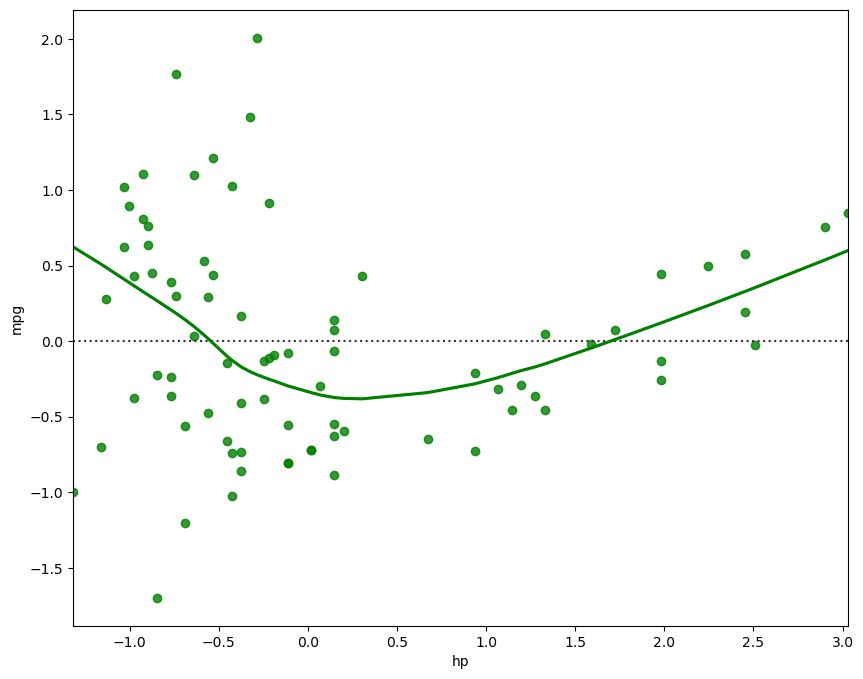

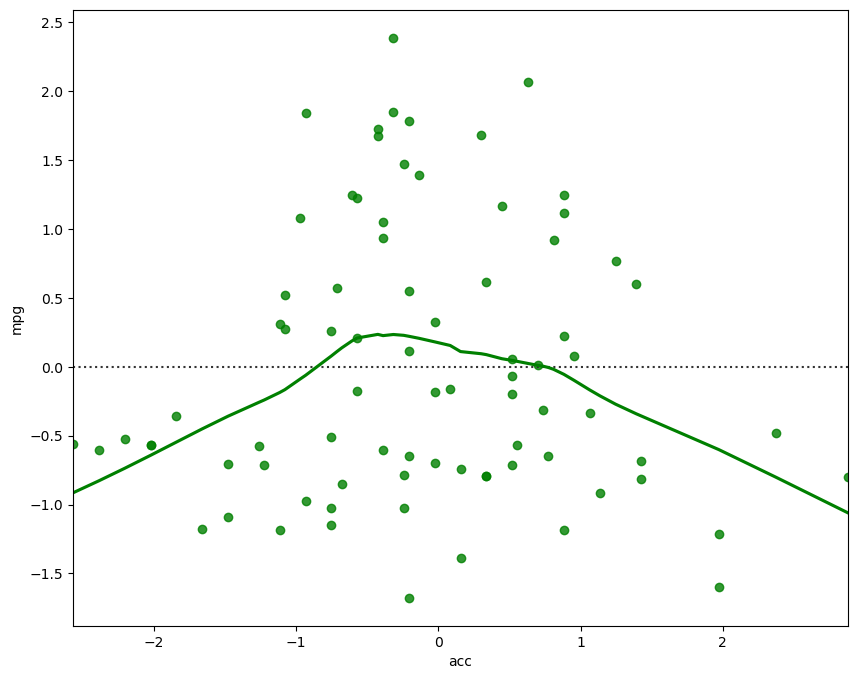

In [27]:
# Is OLS a good model ? Lets check the residuals for some of these predictor.

# x_test is a numpy array — use x_test_df (DataFrame with column names) for named indexing
fig = plt.figure(figsize=(10,8))
sns.residplot(x=x_test_df['hp'], y=y_test['mpg'], color='green', lowess=True)

fig = plt.figure(figsize=(10,8))
sns.residplot(x=x_test_df['acc'], y=y_test['mpg'], color='green', lowess=True)
plt.show()

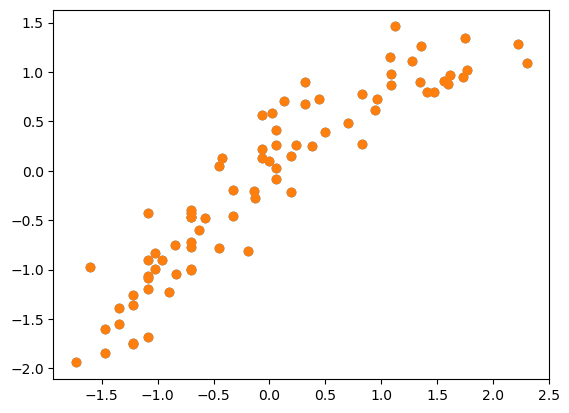

In [30]:
# predict mileage (mpg) for a set of attributes not in the training or test set
y_pred = regression_model.predict(x_test)

# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading to high R and R2 values
#plt.rcParams['figure.dpi'] = 500
plt.scatter(y_test['mpg'], y_pred)
plt.show()

# Inference

**Both Ridge & Lasso regularization performs very well on this data, though Ridge gives a better score. The above scatter plot depicts the correlation between the actual and predicted mpg values.**
